In [834]:
"""
        copyright (c) 2012-2017 Oscar Riveros. all rights reserved.
                           oscar.riveros@peqnp.com

    without any restriction, Oscar Riveros reserved rights, patents and
  commercialization of this knowledge or derived directly from this work.

http://twitter.com/maxtuno 
http://klout.com/maxtuno 
http://independent.academia.edu/oarr

A O(n) UNT ALGORITHM FOR THE UNION-FIND PROBLEM
https://www.academia.edu/31682983/A_O_n_UNT_ALGORITHM_FOR_THE_UNION-FIND_PROBLEM
"""

class USTCONN:
    def __init__(self):
        self.universe = []
        self.size = 0

    def __str__(self):
        paths = ''
        for item in self.universe:
            path = self.nary(item)
            if path:
                paths += '{}, '.format(path)
        return paths

    def nary(self, n):
        s = ''
        while n:
            s += str(n % 2)
            n //= 2
        return [idx for idx in range(len(s)) if s[idx] == '1']

    def union(self, a, b):
        element = (1 << a) | (1 << b)
        idx = 0
        while idx != self.size:
            if self.universe[idx] & element:
                element |= self.universe[idx]
                del self.universe[idx]
                idx -= 1
                self.size -= 1
            idx += 1
        self.universe.append(element)
        self.size += 1

    def connected(self, a, b):
        for item in self.universe:
            if (item & (1 << a)) and (item & (1 << b)):
                return item
        return 0

    def make_set(self, a):
        self.union(a, a)

    def find(self, a):
        return self.connected(a, a)

In [835]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

[2, 3, 7, 9], [0], [1, 4, 5, 6, 8], 


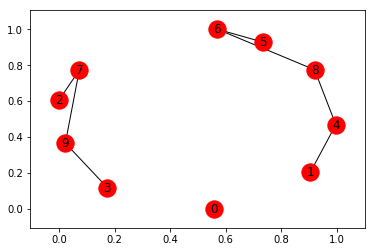

In [847]:
size = 10

g = nx.Graph(np.random.randint(0, size, size=(size, 2)).tolist())
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos, alpha=1)
plt.draw()

ustconn = USTCONN()

edges = g.edges()
    
for a, b in edges:
    g.add_edge(a, b)
    ustconn.union(a, b)

print(ustconn)

In [843]:
ustconn.nary(ustconn.find(0))

[0, 1, 2, 3, 4, 5, 6, 7, 9]